<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Diego Alberto López Lazareno y Alejandra Rico Rosales.

**Fecha:** 12 de octubre del 2021.

**Expediente** : IF722100, IF720838.
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/diegolazareno/Tarea6_DALopez_ARico

# Tarea 6: Clase 10

In [1]:
from scipy import optimize
from scipy.stats import beta
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

## Enunciado de tarea

> 1. Demostrar la validez de la siguiente ecuación
> $$p_{i+1}=\frac{n-i}{i+1}\frac{p}{1-p} p_i \longrightarrow \text{Hablar de las ventajas que sea recursiva}$$

> 2. Seguir un procedimiento similar al mostrado cuando se generó una distribución binomial, pero en esta caso genere un código que genere variables aletorias Poisson cuya función de distribución de probabilidad esta dada por:
> $$P(k,\lambda)=\frac{e^{-\lambda}(\lambda)^k}{k!}$$
> Demuestre matemáticamente que 
> $$P(k+1)=\frac{\lambda}{k+1}P(k)$$
> y a partir de esta relación genere variables aletorias que distribuyen poisson usando el método de la transformada inversa.
> Enlace: https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_Poisson

Partiendo que se desea generar variables aleatorias para la siguiente función de densidad
$$f(x)=30(x^2-2x^3+x^4)$$
Responda los siguientes literales:

> 3. Usar como función que mayora a $f(x)$ a $t(x)=a \sin(\pi x)$ donde a es el máximo de la función $f(x)$ y graficarlas en una misma gráfica, para validar que en realidad si cumple la condición $t(x)\geq f(x)$.

> 4. Encontrar la función de densidad $g(x)$ según lo visto en clase. Reportar todos los cálculos realizados para encontrar dicha función usando Markdown (Latex).

> 5. Usar la función encontrada en el punto 4 y utilizar el método de la transformada inversa visto en la clase 9, para generar variables aleatorias que sigan la distribución $g(x)$. **Nota:** Recuerde que el método de la transformada inversa funciona con la distribución de probabilidad acumulada y no con su densidad. Nuevamente similar al punto anterior reportar todos los cálculos usando Markdown (Latex). 

> 6. Según el punto 5, generar 10000 puntos aleatorios que sigan la distribución $g(x)$ y comparar con su histograma para validar que los puntos generados siguen la distribución deseada.

> 7. Genere 500 puntos aleatorios usando el método de aceptación y rechazo y las funciones $f(x)$ y $t(x)$ para validar que todos los cálculos anteriores están correctamente realizados.

> 8. Comparar el porcentaje de puntos de aceptación cuando se usa $t(x)$ constante y $t(x)$ un pulso senoidal. Concluir.

> 9. Genere una variable aleatoria $X$ a partir de la siguiente PDF
$$f(x)=20x(1-x)^3$$ 
> usando el método de aceptación y rechazo.

### Ejercicio 1: (enunciado)

> 1. Demostrar la validez de la siguiente ecuación
> $$p_{i+1}=\frac{n-i}{i+1}\frac{p}{1-p} p_i \longrightarrow \text{Hablar de las ventajas que sea recursiva}$$

Código de solución Diego

Probabilidad del experimento $i$

$$P(X = i) = \frac{n!}{i! (n - i)!} p^i (1 - p)^{n - i}$$

Probabilidad del experimento $i + 1$

$$P(X = i + 1) = \frac{n!}{(i + 1)! (n - (i + 1))!} p^{i + 1} (1 - p)^{n - (i + 1)}$$

$$P(X = i + 1) = \frac{n!}{(i + 1)! (n - i - 1)!} p^{i + 1} (1 - p)^{n - i - 1}$$

Demostración

$$ \frac{P(X = i + 1)}{P(X = i)} =  \frac{\frac{n!}{(i + 1)! (n - i - 1)!} p^{i + 1} (1 - p)^{n - i - 1}}{\frac{n!}{i! (n - i)!} p^i (1 - p)^{n - i}} $$

$$ \frac{P(X = i + 1)}{P(X = i)} =  \frac{i! (n - i)! p^{i + 1} (1 - p)^{n - i - 1}}{(i + 1)! (n - i - 1)! p^i (1 - p)^{n - i}} $$

$$ \frac{P(X = i + 1)}{P(X = i)} =  \frac{i! \space (n - i) \space (n - i - 1)! \space p^{i + 1} \space (1 - p)^{n - i - 1}}{(i + 1) \space i! \space (n - i - 1)! \space p^i \space (1 - p)^{n - i}} $$

$$ \frac{P(X = i + 1)}{P(X = i)} =  \frac{(n - i) \space p^{i + 1} \space (1 - p)^{n - i - 1}}{(i + 1) \space p^i \space (1 - p)^{n - i}} $$

$$ \frac{P(X = i + 1)}{P(X = i)} =  \frac{(n - i) \space p^{i} \space p \space (1 - p)^{n - i}}{(i + 1) \space p^i \space (1 - p)^{n - i} \space (1 - p)} $$

$$ \frac{P(X = i + 1)}{P(X = i)} =  \frac{(n - i) \space p}{(i + 1) \space (1 - p)} $$

$$ \frac{P(X = i + 1)}{P(X = i)} =  \frac{n - i}{i + 1} \frac{p}{1 - p} $$

$$ P(X = i + 1) =  \frac{n - i}{i + 1} \frac{p}{1 - p} P(X = i) $$

$$ P_{i + 1} =  \frac{n - i}{i + 1} \frac{p}{1 - p} P_i $$

+ El que la ecuación sea recursiva presenta una ventaja en eficiencia computacional significativa en comparación con la expresión inicial, pues esta última contiene a la operación aritmética factorial: lo que conlleva mayor carga de cómputo al momento de calcular probabilidades para $n$ ensayos; sobre todo si se trata de un número muy grande. La expresión a la que se llegó no contiene a la operación factorial, pues sólo necesita de la probabilidad del ensayo $i$ para calcular la probabilidad de ocurrencia del ensayo $i + 1$.

Código de solución Alejandra

$$p_{i+1}  = \frac{n!}{(i+1)!(n-(i+1))!}p^{i+1}(1-p)^{n-(i+1)}$$ 

$$ \frac{\frac{n!}{(i+1)!(n-(i+1))!}p^{i+1}(1-p)^{n-(i+1)}}{\frac{n!}{i!(n-i)!}p^i(1-p)^{n-i}} = \frac {(n-i)p}{(1+i)(1-p)}p_i $$
 
$$p_{i+1}=\frac{n-i}{i+1}\frac{p}{1-p} p_i $$

+ El que la ecuación sea recursiva presenta una ventaja en eficiencia computacional significativa en comparación con la expresión inicial, pues esta última contiene a la operación aritmética factorial: lo que conlleva mayor carga de cómputo al momento de calcular probabilidades para $n$ ensayos; sobre todo si se trata de un número muy grande. La expresión a la que se llegó no contiene a la operación factorial, pues sólo necesita de la probabilidad del ensayo $i$ para calcular la probabilidad de ocurrencia del ensayo $i + 1$.

### Ejercicio 2: (enunciado)

> 2. Seguir un procedimiento similar al mostrado cuando se generó una distribución binomial, pero en esta caso genere un código que genere variables aletorias Poisson cuya función de distribución de probabilidad esta dada por:
> $$P(k,\lambda)=\frac{e^{-\lambda}(\lambda)^k}{k!}$$
> Demuestre matemáticamente que 
> $$P(k+1)=\frac{\lambda}{k+1}P(k)$$
> y a partir de esta relación genere variables aletorias que distribuyen poisson usando el método de la transformada inversa.
> Enlace: https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_Poisson

Código de solución Diego

Probabilidad del experimento $k$

$$P(X = k) = \frac{e^{-\lambda} \space \lambda^k}{k!}$$

Probabilidad del experimento $k + 1$

$$P(X = k + 1) = \frac{e^{-\lambda} \space \lambda^{k + 1}}{(k + 1)!}$$

Demostración

$$ \frac{P(X = k + 1)}{P(X = k)} = \frac{\frac{e^{-\lambda} \space \lambda^{k + 1}}{(k + 1)!}}{\frac{e^{-\lambda} \space \lambda^k}{k!}} $$

$$ \frac{P(X = k + 1)}{P(X = k)} = \frac{e^{-\lambda} \space \lambda^{k + 1} k!}{(k + 1)! e^{-\lambda} \space \lambda^k} $$

$$ \frac{P(X = k + 1)}{P(X = k)} = \frac{\lambda^{k + 1} k!}{(k + 1)! \space \lambda^k} $$

$$ \frac{P(X = k + 1)}{P(X = k)} = \frac{\lambda^{k} \space \lambda \space k!}{(k + 1) \space k! \space \lambda^k} $$

$$ \frac{P(X = k + 1)}{P(X = k)} = \frac{\lambda}{(k + 1)} $$

$$ P(X = k + 1) = \frac{\lambda}{k + 1} P(X = k) $$

$$ P_{k + 1} = \frac{\lambda}{k + 1} P_{k} $$

In [2]:
# Código de solución estudiante 1
def poissonDistribution(k : "Número de ocurrencias del evento", l : "Número de veces que se espera ocurra el fenómeno durante un intervalo dado"):
    # Almacenamiento de las probabilidades
    pr = np.zeros(k)
    pr[0] = np.exp(-l)
    
    # Cómputo de la probabilidad para el (k-1)-ésimo evento
    def poissonProbability(k_i):
        nonlocal pr 
        pr[k_i + 1] = (l / (k_i + 1)) * pr[k_i]
    
    [poissonProbability(k_i) for k_i in range(k - 1)]
    
    # Cómputo de la probabilidad para el k-ésimo evento
    pr_k = (l / k) * pr[k - 1]
    
    return pr, pr_k 

def discreteDistribution(N : "Número de muestras a generar", cumulativeProb : "Probabilidad acumulada", 
                         index : "Número de ocurrencias del evento"):
    # Variable aleatoria uniforme entre 0 y 1
    U = np.random.random(N)
    # Método de la transformada inversa caso discreto
    rand2reals = {i : j for i, j in enumerate(index)}
    values = pd.Series([sum([1 for p in cumulativeProb if p < u_i]) for u_i in U]).map(rand2reals)
    
    return values

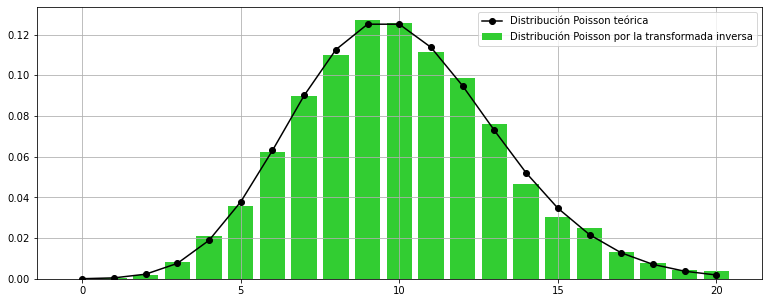

In [3]:
# Parámetros del ejercicio: muestras a generar, número de ocurrencias del evento y número de veces que se espera ocurra el fenómeno durante un intervalo de tiempo
N, k, l = 10000, 20, 10
poissonDist1, poissonDist2 = poissonDistribution(k, l)
# Probabilidad acumulada
cumulativeProb = np.cumsum(poissonDist1)
# Método de la transformada inversa caso discreto
xi = discreteDistribution(N, cumulativeProb, np.arange(k + 1))
value_counts = pd.value_counts(xi)

# Visualización de los resultados
plt.figure(figsize = (13, 5))
plt.bar(value_counts.index, value_counts / N, label = "Distribución Poisson por la transformada inversa", color = "limegreen")
plt.plot(np.arange(k + 1), list(poissonDist1) + [poissonDist2], "-o", color = "k", label = "Distribución Poisson teórica")
plt.legend(loc = "best")
plt.grid()

+ Podemos afirmar que el método de la transformada inversa (caso discreto) sí arroja variables aleatorias que se distribuyen según la distribución de Poisson teórica.

Código de solución Alejandra

$$\frac{P(k+1)}{P(k)} = \frac{e^{-\lambda}\lambda^{k+1} k!}{(k+1)!e^{-\lambda}\lambda^k}$$

$$\frac{P(k+1)}{P(k)} = \frac{e^{-\lambda}\lambda^{k+1} 1}{e^{-\lambda}\lambda^k ( k + 1)}$$


$$\frac{P(k+1)}{P(k)} = \frac{\lambda^{k+1} 1}{\lambda^k ( k + 1)}$$

$$\frac{P(k+1)}{P(k)} = \frac{\lambda}{( k + 1)}$$

$$P(k+1) = \frac{\lambda}{( k + 1)} P(k)$$

In [4]:
# Código de solución estudiante 2
N = 10000
n = 12
l = 4
var = np.random.rand(N)

def poison(k,l):
    global vr
    vr = np.zeros(k)
    vr[0] = np.exp(-l)
    def p(i):
        vr[i+1]=l/(i+1)*vr[i]
        
    [p(i) for i in range(k-1)]
    return np.cumsum(vr)

acum = poison(n,l)

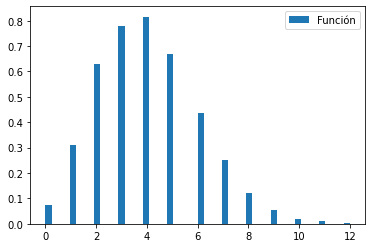

In [5]:
p1 = list(map(lambda i:sum(1 for j in acum if j<var[i]),range(N)))
plt.hist(p1,50,density=True,label='Función')
plt.legend()
plt.show()

Partiendo que se desea generar variables aleatorias para la siguiente función de densidad
$$f(x)=30(x^2-2x^3+x^4)$$

### Ejercicio 3: (enunciado)

> 3. Usar como función que mayora a $f(x)$ a $t(x)=a \sin(\pi x)$ donde a es el máximo de la función $f(x)$ y graficarlas en una misma gráfica, para validar que en realidad si cumple la condición $t(x)\geq f(x)$.

Código de solución Diego

El máximo de f(x) es  1.875


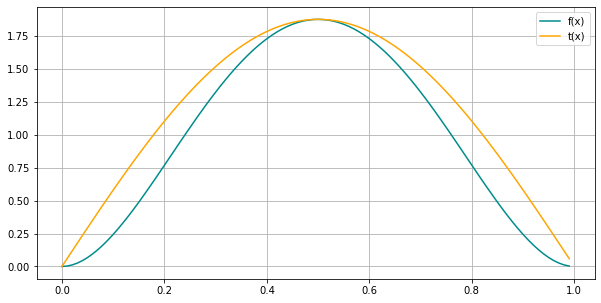

In [6]:
# Código de solución estudiante 1
# f(x) = 30 * (x^2 - 2x^3 + x^4)
f = lambda x : 30 * (x**2 - 2 * x ** 3 + x** 4)
max_f = f(optimize.fmin(lambda x : -f(x), 0, disp=False))
print("El máximo de f(x) es ", max_f[0])
# t(x)
t = lambda x : max_f * np.sin(np.pi * x)
x = np.arange(0, 1, 0.01)

# Visualización
plt.figure(figsize = (10, 5))
plt.plot(x, f(x), color = "darkcyan", label = "f(x)")
plt.plot(x, t(x), color = "orange", label = "t(x)")
plt.legend(loc = "best")
plt.grid();

+ Se cumple la condición: $t(x) \geq f(x)$.

Código de solución Alejandra

In [7]:
# Código de solución estudiante 2

f = lambda x:30*(x**2-2*x**3+x**4)
maxf = f(optimize.fmin(lambda x: -f(x), 0, disp=False))
t = lambda x: maxf * np.sin(np.pi*x)

x = np.arange(0,1,0.01)

print('Máx. de f:',maxf)

Máx. de f: [1.875]


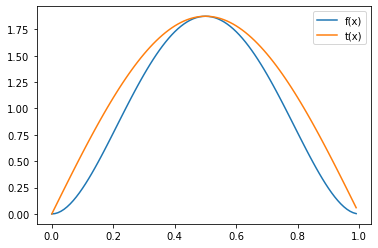

In [8]:
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()
plt.show()

### Ejercicio 4: (enunciado)

> 4. Encontrar la función de densidad $g(x)$ según lo visto en clase. Reportar todos los cálculos realizados para encontrar dicha función usando Markdown (Latex).

Código de solución Diego

Encontrando la función de densidad $g(x)$:

$$ g(x) = \frac{t(x)}{c} $$

$$ g(x) = \frac{1.875 \space sin(\pi x)}{c} $$

Resolviendo para $c$:

$$ c = \int_{-\infty}^{\infty} t(x) \space dx $$

$$ c = 1.875 \int_{0}^{1} sin(\pi x) \space dx = \frac{-1.875 cos(\pi x)}{\pi} \Big|_{0}^{1} = \frac{1.875}{\pi} [-cos(\pi) + cos(0)] = \frac{1.875}{\pi} [1 + 1] = \frac{2 \space (1.875)}{\pi} $$

Sustituyendo $c$ en $g(x)$:

$$ g(x) = \frac{1.875 \space sin(\pi x)}{\frac{2 \space (1.875)}{\pi}} = \frac{ 1.875 \space (\pi) \space sin(\pi x)}{2 \space (1.875)} = \frac{\pi \space sin(\pi x)}{2} $$

Código de solución Alejandra

$$a=0$$ 
$$b=1$$

$$g(x)=\frac{f(x)}{c}$$

$$c = \int_{-\infty}^{\infty} t(x)dx$$.

$$c =\int_{a}^{b} t(x) dx = \int_{0}^{1} a \sin(\pi x) dx = \frac{2a}{\pi}$$

$$ g(x) = \frac{\pi}{2} \sin(\pi x) $$

### Ejercicio 5: (enunciado)

> 5. Usar la función encontrada en el punto 4 y utilizar el método de la transformada inversa visto en la clase 9, para generar variables aleatorias que sigan la distribución $g(x)$. **Nota:** Recuerde que el método de la transformada inversa funciona con la distribución de probabilidad acumulada y no con su densidad. Nuevamente similar al punto anterior reportar todos los cálculos usando Markdown (Latex). 

Código de solución Diego

Función de densidad de probabilidad $g(x)$:

$$ g(x) = \frac{\pi \space sin(\pi x)}{2} $$

Encontrando $G(x)$, es decir, la distribución de probabilidad acumulada:

$$ \int_{-\infty}^{\infty}g(x) \space dx = \int_{0}^{x} \frac{\pi \space sin(\pi x)}{2} \space dx $$

$$ \int_{0}^{x} \frac{\pi \space sin(\pi x)}{2} \space dx = \frac{-\pi \space cos(\pi x)}{2 \pi} \Big|_{0}^{x} = \frac{-1}{2} cos(\pi x) \Big|_{0}^{x} = \frac{-1}{2} cos(\pi x) + \frac{1}{2} = \frac{1}{2} (1 - cos(\pi x))$$

$$ G(x) = \frac{1}{2} (1 - cos(\pi x)) $$

Recordamos que $G(x)$ sigue una distribución uniforme entre $0$ y $1$:

$$ U \sim [0, 1]= \frac{1}{2} (1 - cos(\pi x)) $$

$$ 2 U = 1 - cos(\pi x) $$

$$ cos(\pi x) = 1 - 2 U $$

$$ \pi x = arccos(1 - 2 U) $$

$$ x = \frac{arccos(1 - 2 U)}{\pi} $$

Código de solución Alejandra

$$G(x) = \int_{0}^{1} \frac{\pi}{x} \sin(\pi x) = U$$

$$\frac{1-\cos(\pi x)}{2} = U$$

$$x = \frac{\cos^{-1}(-2U +1)}{\pi}$$

### Ejercicio 6: (enunciado)

> 6. Según el punto 5, generar 10000 puntos aleatorios que sigan la distribución $g(x)$ y comparar con su histograma para validar que los puntos generados siguen la distribución deseada.

Código de solución Diego

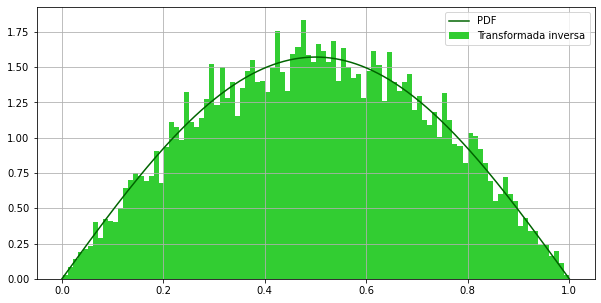

In [9]:
# Código de solución estudiante 1
def distribution_gx(N : "Número de muestras", plot = True):
    # Variable aleatoria uniforme
    U = np.random.uniform(size = N)
    # Método de la transformada inversa
    x = np.arccos(1 - 2 * U) / np.pi
    
    # Función de densidad de probabilidad
    interval = np.arange(0, 1, 0.0001)
    g_x = np.pi * np.sin(np.pi * interval) / 2
    
    if plot:
        plt.figure(figsize = (10, 5))
        plt.hist(x, bins = 100, density = True, label = "Transformada inversa", color = "limegreen")
        plt.plot(interval, g_x, label = "PDF", color = "darkgreen")
        plt.legend()
        plt.grid();
    
    return x
    
N = 10000
g_x = distribution_gx(N, plot = True)

+ Se valida que los puntos generados siguen la distribución deseada.

Código de solución Alejandra

In [10]:
# Código de solución estudiante 2

def dist(N):
    return (np.arccos(-2*np.random.random(N)+1))/np.pi

gx = lambda x: (np.pi/2)*np.sin(np.pi*x)
N = 10000 
gn = dist(N)

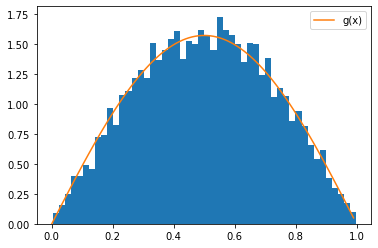

In [11]:
plt.hist(gn,50,density=True)
plt.plot(x,gx(x),label='g(x)')
plt.legend()
plt.show()

### Ejercicio 7: (enunciado)

> 7. Genere 500 puntos aleatorios usando el método de aceptación y rechazo y las funciones $f(x)$ y $t(x)$ para validar que todos los cálculos anteriores están correctamente realizados.

Código de solución Diego

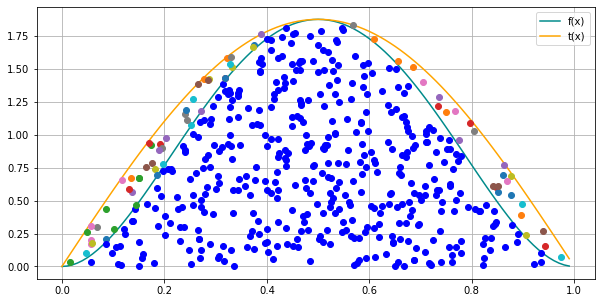

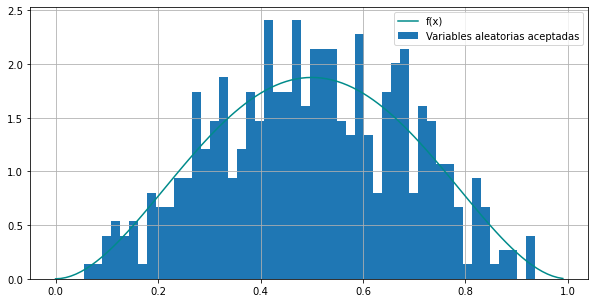

In [12]:
# Código de solución estudiante 1
def method_acceptance_rejection(R1, R2, f, t, plot = True):
    # f(x)
    f_x = f(R1)
    # t(x)
    t_x = t(R1)
    # Condición
    condition = f_x >= R2 * t_x
    
    if plot:
        [plt.plot(R1[i], R2[i]*t_x[i], "ob") if condition[i] else plt.plot(R1[i], R2[i]*t_x[i], "o") 
         for i in range(len(condition))]
    
    # Muestras aceptadas
    x_accepted = [R1[i] for i in range(len(condition)) if condition[i]]
    
    return x_accepted
    
N = 500
R1 = distribution_gx(N, plot = False)
R2 = np.random.uniform(size = N)

# Visualización
plt.figure(figsize = (10, 5))
plt.plot(x, f(x), color = "darkcyan", label = "f(x)")
plt.plot(x, t(x), color = "orange", label = "t(x)")
plt.legend(loc = "best")
plt.grid();
x_accepted1 = method_acceptance_rejection(R1, R2, f, t, plot = True)

# Validación del resultado
plt.figure(figsize = (10, 5))
plt.plot(x, f(x), color = "darkcyan", label = "f(x)")
plt.hist(x_accepted1, density = True, bins = 50, label = "Variables aleatorias aceptadas")
plt.legend(loc = "best")
plt.grid();

+ Se valida que las variables aleatorias generadas distribuyen según la f(x). Al ser pocas, menos de $500$, no se ajustan del todo a la curva, pero esto se soluciona incrementándolas.

Código de solución Alejandra

In [42]:
# Código de solución estudiante 2

def acep_rechazo(R1, R2, f, t, plot = True):
    f_x = f(R1)
    t_x = t(R1)
    condition = R2*t_x <=f_x
    if plot:
        [plt.plot(R1[i], R2[i]*t_x[i], "ob") if condition[i] else plt.plot(R1[i], R2[i]*t_x[i], "o") 
         for i in range(len(condition))]
    var_acep = [R1[i] for i in range(len(condition)) if condition[i]]
    
    return var_acep

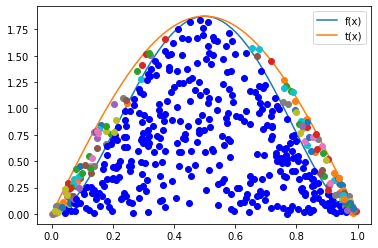

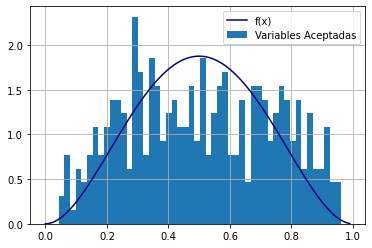

In [43]:
f = lambda x:30*(x**2-2*x**3+x**4)
t = lambda x: maxf * np.sin(np.pi*x)
x = np.arange(0,1,0.01)

plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()

R2 = np.random.rand(500)
R1 = np.random.rand(500) 

var = acep_rechazo(R2,R1,f,t)

# Validación del resultado
plt.figure(figsize = (6, 4))
plt.plot(x, f(x), color = "navy", label = "f(x)")
plt.hist(var, density = True, bins = 50, label = "Variables Aceptadas")
plt.legend(loc = "best")
plt.grid();

### Ejercicio 8: (enunciado)

> 8. Comparar el porcentaje de puntos de aceptación cuando se usa $t(x)$ constante y $t(x)$ un pulso senoidal. Concluir.


Código de solución Diego

In [ ]:
# Código de solución estudiante 1
# t(x) como constante
t_constant = lambda x : np.ones(len(x)) * max_f
N = 500
R1 = np.random.uniform(size = N)
R2 = np.random.uniform(size = N)

# Visualización
plt.figure(figsize = (10, 5))
plt.plot(x, f(x), color = "darkcyan", label = "f(x)")
plt.plot(x, t_constant(x), color = "orange", label = "t(x)")
plt.legend(loc = "best")
plt.grid();
x_accepted2 = method_acceptance_rejection(R1, R2, f, t_constant, plot = True)

In [ ]:
# Resultados
ans1 = len(x_accepted1) / N
ans2 = len(x_accepted2) / N

print("El porcentaje de puntos de aceptación cuando se usa t(x) como pulso senoidal es del " + 
      str(round(ans1 * 100, 2)) + " %")
print("El porcentaje de puntos de aceptación cuando se usa t(x) como constante es del " + str(round(ans2 * 100, 2)) + " %")

+ Con el pulso senoidal el porcentaje de aceptación es mayor que con la constante. Dicho pulso senoidal es de mayor utilidad si se requiere aceptar una muestra considerable de puntos, tan sólo en este ejercicio el pulso senoidal propuesto logra que se acepten el $84.2\%$ de los puntos.

Código de solución Alejandra

In [ ]:
# Código de solución estudiante 2

def acep_rechazo2(R2:'Variables distruidas U~U(0,1)',
                  R1:'Variables distribuidas como g(x)',
                  f:'función objetivo a generar',
                  t:'función que mayora a f'):
    fx = f(R1)
    tx = t(R1)
    cond = R2*tx <=fx
    rnd = [R1[i] for i in range(len(R1)) if cond[i]]          
    return rnd

x = np.arange(0,1,0.01)
f = lambda x:30*(x**2-2*x**3+x**4)
maxf = f(optimize.fmin(lambda x:-f(x),0,disp=False))

tcons = lambda x: maxf*np.ones(len(x))
tsin = lambda x: maxf*np.sin(x*np.pi) 

R2 = np.random.rand(500)
R1 = np.random.rand(500)

cons = acep_rechazo2(R2, R1, f, tcons)
sin = acep_rechazo2(R2, R1, f, tsin)

In [ ]:
print('Porcentaje de puntos de aceptación cuando t(x) es constante:', len(cons)/500)
print('Porcentaje de puntos de aceptación cuando t(x) usa un pulso senoidal:',len(sin)/500)

### Ejercicio 9: (enunciado)

> 9. Genere una variable aleatoria $X$ a partir de la siguiente PDF
$$f(x)=20x(1-x)^3$$ 
> usando el método de aceptación y rechazo.

Código de solución Diego

In [ ]:
# Código de solución estudiante 1
f = lambda x : 20 * x * (1 - x) ** 3
max_f = f(optimize.fmin(lambda x : -f(x), 0, disp=False))
t = lambda x : max_f * np.ones(len(x)) 
N = 2500
R1 = np.random.uniform(size = N)
R2 = np.random.uniform(size = N)

plt.figure(figsize = (10, 5))
plt.plot(x, f(x), label = "f(x)", color = "k", lw = 5)
plt.plot(x, t(x), label = "t(x)", color = "red", lw = 5)
plt.legend(loc = "best")
plt.grid();
x_accepted3 = method_acceptance_rejection(R1, R2, f, t, plot = True)
ans3 = len(x_accepted3) / N
print("El porcentaje de puntos de aceptación cuando se usa t(x) como constante es del " + str(round(ans3 * 100, 2)) + " %")

Código de solución Alejandra

In [ ]:
# Código de solución estudiante 2

f = lambda x:20*x*(1-x)**3
maxf = f(optimize.fmin(lambda x:-f(x),0,disp=False))
t = lambda x: maxf*np.ones(len(x)) 

x = np.arange(0,1,0.01)  
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()

# Validación del método
R2 = np.random.rand(1000)
R1 = np.random.rand(1000)

acep_rechazo(R2,R1,f,t)